In [2]:
def linestyle_generator():
    linestyle = ["-","--","-.",";"]
    lineID = 0
    while True:
        yield linestyle[lineID]
        lineID = (lineID + 1) % len(linestyle)

In [3]:
def plot_set(fig_ax, *args):
    fig_ax.set_xlabel(args[0])
    fig_ax.set_ylabel(args[1])
    fig_ax.grid(ls=":")
    if len(args)==3:
        fig_ax.legend(loc=args[2])

In [4]:
def bodeplot_set(fig_ax, *args):
    fig_ax[0].grid(which="both",ls=":")
    fig_ax[0].set_ylabel("Gain [dB]")

    fig_ax[1].grid(which="both",ls=":")
    fig_ax[1].set_xlabel("$\omega$ [rad/s]")
    fig_ax[1].set_ylabel("Phase [deg]")

    if len(args) > 0:
        fig_ax[1].legend(loc=args[0])
    if len(args) > 1:
        fig_ax[0].legend(loc=args[1])

In [5]:
from control.matlab import*
import matplotlib.pyplot as plt
import numpy as np

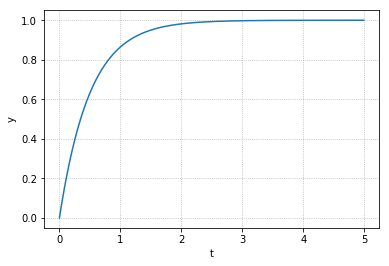

In [6]:
T, K = 0.5, 1
P = tf([0,K],[T,1])
y, t = step(P,np.arange(0,5,0.01))

fig, ax = plt.subplots()
ax.plot(t,y)
plot_set(ax,"t","y")

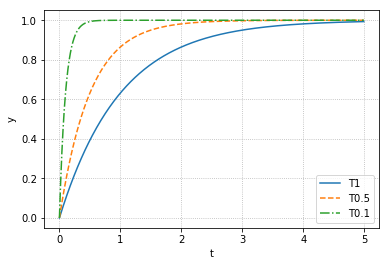

In [7]:
fig, ax = plt.subplots()
LS = linestyle_generator()

K = 1
T = (1,0.5,0.1)
for i in range(len(T)):
    y, t = step(tf([0,K],[T[i],1]), np.arange(0,5,0.01))
    ax.plot(t,y,ls = next(LS), label = "T"+str(T[i]))
plot_set(ax,"t","y","best")

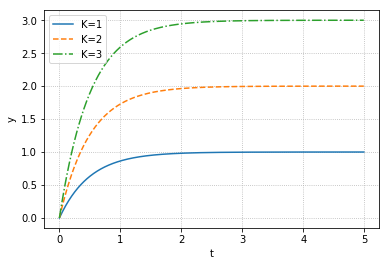

In [8]:
LS = linestyle_generator()
fig, ax = plt.subplots()

T = 0.5
K = [1, 2, 3]
for i in range(len(K)):
    y, t = step(tf([0,K[i]],[T,1]), np.arange(0, 5, 0.01))
    ax.plot(t,y,ls=next(LS),label="K="+str(K[i]))
plot_set(ax,"t","y","upper left")

In [9]:
import sympy as sp
sp.init_printing()
s = sp.Symbol("s")
T = sp.Symbol("T",real = True)
P = 1/((1+T*s)*s)
sp.apart(P,s)

In [11]:
t = sp.Symbol("t", positive=True)
sp.inverse_laplace_transform((1/s)-1/(s+1/T),s,T)

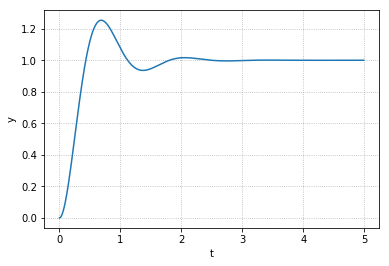

In [12]:
zeta, omega_n = 0.4,5

P = tf([0,omega_n**2], [1,2*zeta*omega_n,omega_n**2])
y, t = step(P, np.arange(0,5,0.01))

fig, ax = plt.subplots()
ax.plot(t,y)
plot_set(ax,"t","y")

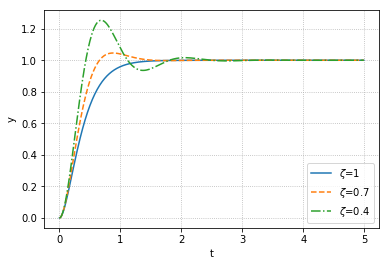

In [16]:
LS = linestyle_generator()
fig, ax = plt.subplots()

zeta = [1,0.7,0.4]
omega_n = 5
for i in range(len(zeta)):
    P = tf([0, omega_n**2],[1, 2*zeta[i]*omega_n, omega_n**2])
    y, t = step(P, np.arange(0,5,0.01))
    
    pltargs = {"ls":next(LS)}
    pltargs["label"] = "$\zeta$=" + str(zeta[i])
    ax.plot(t,y,**pltargs)
plot_set(ax, "t","y","best")

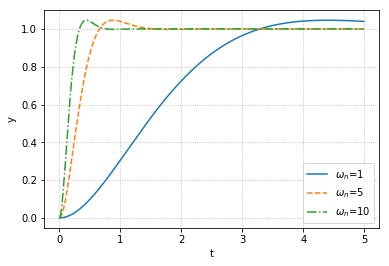

In [18]:
LS = linestyle_generator()
fig, ax = plt.subplots()

zeta = 0.7
omega_n = [1,5,10]

for i in range(len(omega_n)):
    P = tf([0, omega_n[i]**2], [1, 2*zeta*omega_n[i], omega_n[i]**2])
    y, t = step(P, np.arange(0, 5 , 0.01))
    
    pltargs = {"ls": next(LS)}
    pltargs["label"] = "$\omega_n$=" + str(omega_n[i])
    ax.plot(t, y, **pltargs)
plot_set(ax, "t", "y", "best")

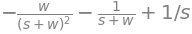

In [19]:
import sympy as sp
sp.init_printing()
s = sp.Symbol("s")
t = sp.Symbol("t",positive = True)
w = sp.Symbol("w",real = True)
P = sp.apart(w**2/(s*(s+w)**2),s)
P

In [20]:
sp.inverse_laplace_transform(P,s,t)

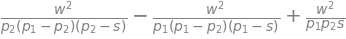

In [22]:
p1 = sp.Symbol("p1", real=True)
p2 = sp.Symbol("p2", real=True)
P = sp.apart(w**2/(s*(s-p1)*(s-p2)),s)
P

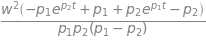

In [23]:
sp.inverse_laplace_transform(P, s, t)

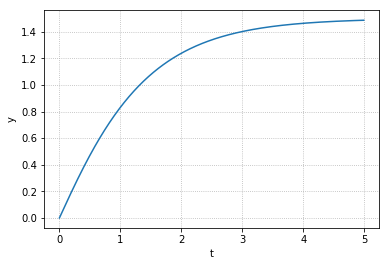

In [24]:
P = tf([1,3], [1,3,2])
y, t = step(P,np.arange(0,5,0.01))
fig, ax = plt.subplots()
ax.plot(t,y)
plot_set(ax,"t","y")

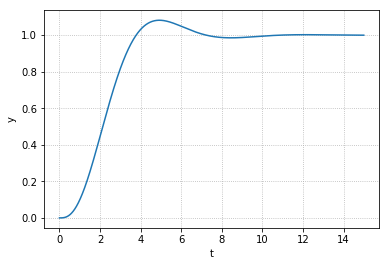

In [28]:
P = tf([0,1], [1,2,2,1])
y, t = step(P,np.arange(0,15,0.01))
fig, ax = plt.subplots()
ax.plot(t,y)
plot_set(ax,"t","y")

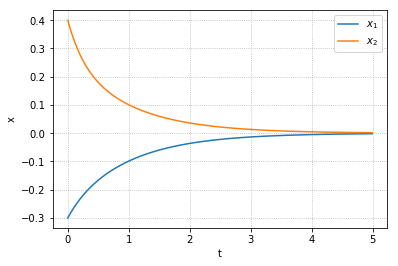

In [29]:
A = [[0, 1], [-4, -5]]
B = [[0], [1]]
C = np.eye(2)
D = np.zeros([2, 1])
P = ss(A, B, C, D)

Td = np.arange(0, 5, 0.01)
X0 = [-0.3, 0.4]
x, t = initial(P, Td, X0)
fig, ax = plt.subplots()
ax.plot(t, x[:,0], label = "$x_1$")
ax.plot(t,x[:,1], label = "$x_2$")
plot_set(ax, "t", "x", "best")

In [35]:
import numpy as np
import sympy as sp
sp.init_printing()
s = sp.Symbol("s")
t = sp.Symbol("t",positive=True)
A = np.array([[0, 1],[-4, 5]])
G = s*sp.eye(2)-A
exp_At = sp.inverse_laplace_transform(sp.simplify(G.inv()), s, t)
exp_At

⎡ ⎛     3⋅t⎞  t    ⎛ 3⋅t    ⎞  t ⎤
⎢ ⎝4 - ℯ   ⎠⋅ℯ     ⎝ℯ    - 1⎠⋅ℯ  ⎥
⎢ ─────────────    ───────────── ⎥
⎢       3                3       ⎥
⎢                                ⎥
⎢  ⎛     3⋅t⎞  t  ⎛   3⋅t    ⎞  t⎥
⎢4⋅⎝1 - ℯ   ⎠⋅ℯ   ⎝4⋅ℯ    - 1⎠⋅ℯ ⎥
⎢───────────────  ───────────────⎥
⎣       3                3       ⎦

In [36]:
import scipy
A = np.array([[0, 1],[-4,-5]])
t = 5
scipy.linalg.expm(A*t)

array([[ 0.00898393,  0.00224598],
       [-0.00898393, -0.00224598]])

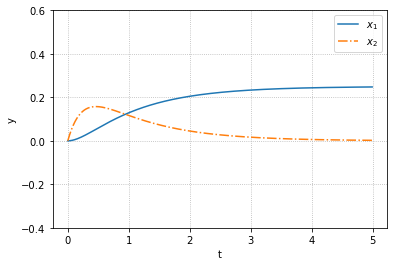

In [40]:
Td = np.arange(0, 5, 0.01)
A = [[0, 1], [-4, -5]]
B = [[0], [1]]
C = np.eye(2)
D = np.zeros([2, 1])
P = ss(A, B, C, D)
x, t = step(P, Td)

fig, ax = plt.subplots()
ax.plot(t, x[:,0],label = "$x_1$")
ax.plot(t, x[:,1], ls = "-.", label = "$x_2$")
ax.set_xticks(np.linspace(0, 5, 6))
ax.set_yticks(np.linspace(-0.4, 0.6, 6))
plot_set(ax, "t", "y", "best")

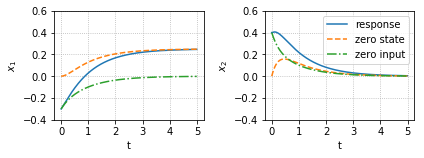

In [43]:
Td = np.arange(0, 5, 0.01)
Ud = 1*(Td>0)
X0 = [-0.3, 0.4]

xst, t = step(P,Td)
xin, _ = initial(P, Td, X0)
x, _, _ = lsim(P, Ud, Td, X0)

fig, ax = plt.subplots(1, 2, figsize=(6,2.3))
for i in [0,1]:
    ax[i].plot(t, x[:,i], label="response")
    ax[i].plot(t, xst[:,i], ls="--", label="zero state")
    ax[i].plot(t, xin[:,i], ls="-.", label="zero input")
    ax[i].set_xticks(np.linspace(0, 5, 6))
    ax[i].set_yticks(np.linspace(-0.4, 0.6, 6))
plot_set(ax[0], "t", "$x_1$")
plot_set(ax[1], "t", "$x_2$", "best")
fig.tight_layout()

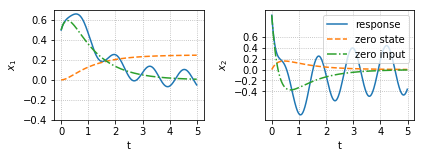

In [44]:
Td = np.arange(0, 5, 0.01)
Ud = 3*np.sin(5*Td)
X0 = [0.5, 1]

xst, t = step(P,Td)
xin, _ = initial(P, Td, X0)
x, _, _ = lsim(P, Ud, Td, X0)

fig, ax = plt.subplots(1, 2, figsize=(6,2.3))
for i in [0,1]:
    ax[i].plot(t, x[:,i], label="response")
    ax[i].plot(t, xst[:,i], ls="--", label="zero state")
    ax[i].plot(t, xin[:,i], ls="-.", label="zero input")
    ax[i].set_xticks(np.linspace(0, 5, 6))
    ax[i].set_yticks(np.linspace(-0.4, 0.6, 6))
plot_set(ax[0], "t", "$x_1$")
plot_set(ax[1], "t", "$x_2$", "best")
fig.tight_layout()

In [46]:
P1 = tf([0,1],[1,1])
print("P1:", pole(P1))
P2 = tf([0, 1], [-1, 1])
print("P2:", pole(P2))

P1: [-1.]
P2: [1.]


In [47]:
P3 = tf([0,1], [1, 0.05, 1])
print("P3:", pole(P3))
P4 = tf([0,1], [1, -0.05, 1])
print("P4:", pole(P4))

P3: [-0.025+0.99968745j -0.025-0.99968745j]
P4: [0.025+0.99968745j 0.025-0.99968745j]


In [50]:
[[Np]], [[Dp]] = tfdata(P4)
print(Dp)
print(np.roots(Dp))

[ 1.   -0.05  1.  ]
[0.025+0.99968745j 0.025-0.99968745j]


In [53]:
import numpy as np
A = np.array([[0, 1],[-4, -5]])
np.linalg.eigvals(A)

array([-1., -4.])

X= [[-1.5        -1.46969697 -1.43939394 ...  1.43939394  1.46969697
   1.5       ]
 [-1.5        -1.46969697 -1.43939394 ...  1.43939394  1.46969697
   1.5       ]
 [-1.5        -1.46969697 -1.43939394 ...  1.43939394  1.46969697
   1.5       ]
 ...
 [-1.5        -1.46969697 -1.43939394 ...  1.43939394  1.46969697
   1.5       ]
 [-1.5        -1.46969697 -1.43939394 ...  1.43939394  1.46969697
   1.5       ]
 [-1.5        -1.46969697 -1.43939394 ...  1.43939394  1.46969697
   1.5       ]]
Y= [[-1.5        -1.5        -1.5        ... -1.5        -1.5
  -1.5       ]
 [-1.46969697 -1.46969697 -1.46969697 ... -1.46969697 -1.46969697
  -1.46969697]
 [-1.43939394 -1.43939394 -1.43939394 ... -1.43939394 -1.43939394
  -1.43939394]
 ...
 [ 1.43939394  1.43939394  1.43939394 ...  1.43939394  1.43939394
   1.43939394]
 [ 1.46969697  1.46969697  1.46969697 ...  1.46969697  1.46969697
   1.46969697]
 [ 1.5         1.5         1.5        ...  1.5         1.5
   1.5       ]]
v= [[ 0.70710678 -0.2425

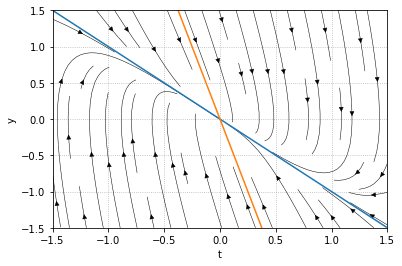

In [61]:
w = 1.5
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
print("X=",X)
print("Y=",Y)
A = np.array([[0, 1], [-4, -5]])
s, v = np.linalg.eig(A)
print("v=",v)
U = A[0,0]*X + A[0,1]*Y
V = A[1,0]*X + A[1,1]*Y
print("U=",U)
print("V=",V)

t = np.arange(-1.5,1.5,0.01)
fig, ax = plt.subplots()
if s.imag[0] == 0 and s.imag[1] == 0:
    ax.plot(t, (v[1,0]/v[0,0]*t), ls="-")
    ax.plot(t, (v[1,1]/v[0,1]*t), ls="-")
ax.streamplot(X, Y, U, V, density=0.7, color="k", linewidth=0.5)
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_xticks(np.arange(-1.5, 1.51, step=0.5))
ax.set_yticks(np.arange(-1.5, 1.51, step=0.5))
plot_set(ax, "t", "y")

X= [[-1.5        -1.46969697 -1.43939394 ...  1.43939394  1.46969697
   1.5       ]
 [-1.5        -1.46969697 -1.43939394 ...  1.43939394  1.46969697
   1.5       ]
 [-1.5        -1.46969697 -1.43939394 ...  1.43939394  1.46969697
   1.5       ]
 ...
 [-1.5        -1.46969697 -1.43939394 ...  1.43939394  1.46969697
   1.5       ]
 [-1.5        -1.46969697 -1.43939394 ...  1.43939394  1.46969697
   1.5       ]
 [-1.5        -1.46969697 -1.43939394 ...  1.43939394  1.46969697
   1.5       ]]
Y= [[-1.5        -1.5        -1.5        ... -1.5        -1.5
  -1.5       ]
 [-1.46969697 -1.46969697 -1.46969697 ... -1.46969697 -1.46969697
  -1.46969697]
 [-1.43939394 -1.43939394 -1.43939394 ... -1.43939394 -1.43939394
  -1.43939394]
 ...
 [ 1.43939394  1.43939394  1.43939394 ...  1.43939394  1.43939394
   1.43939394]
 [ 1.46969697  1.46969697  1.46969697 ...  1.46969697  1.46969697
   1.46969697]
 [ 1.5         1.5         1.5        ...  1.5         1.5
   1.5       ]]
v= [[-0.70710678 -0.2425

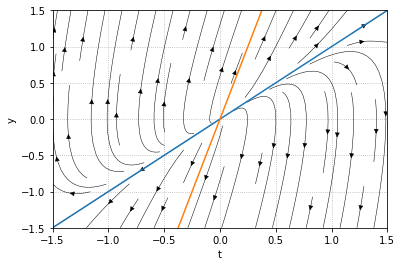

In [62]:
w = 1.5
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
print("X=",X)
print("Y=",Y)
A = np.array([[0, 1], [-4, 5]])
s, v = np.linalg.eig(A)
print("v=",v)
U = A[0,0]*X + A[0,1]*Y
V = A[1,0]*X + A[1,1]*Y
print("U=",U)
print("V=",V)

t = np.arange(-1.5,1.5,0.01)
fig, ax = plt.subplots()
if s.imag[0] == 0 and s.imag[1] == 0:
    ax.plot(t, (v[1,0]/v[0,0]*t), ls="-")
    ax.plot(t, (v[1,1]/v[0,1]*t), ls="-")
ax.streamplot(X, Y, U, V, density=0.7, color="k", linewidth=0.5)
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_xticks(np.arange(-1.5, 1.51, step=0.5))
ax.set_yticks(np.arange(-1.5, 1.51, step=0.5))
plot_set(ax, "t", "y")